In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('framingham.csv')
df=df.dropna()
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [3]:
df.shape

(3656, 16)

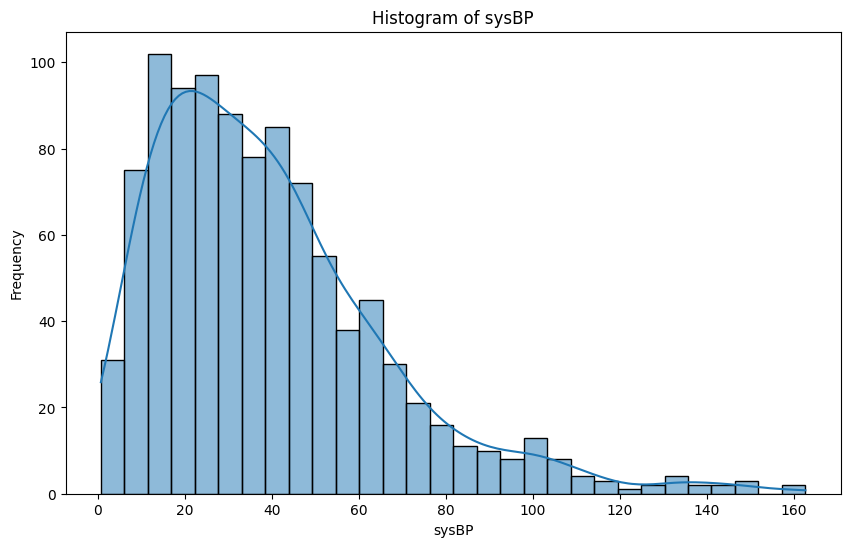

<Figure size 1000x600 with 0 Axes>

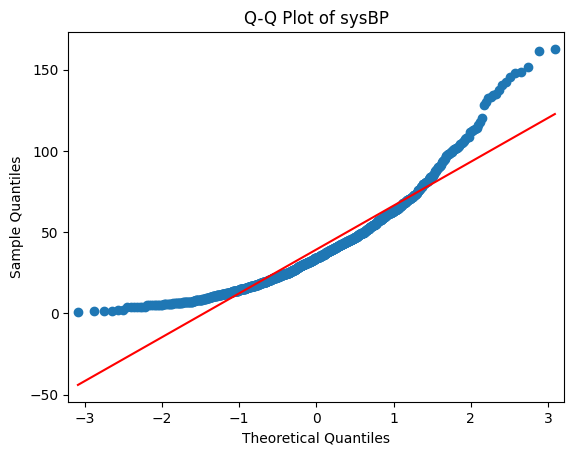

   Shapiro-Wilk p-value  Kolmogorov-Smirnov p-value  \
0          7.094915e-25                3.507653e-07   

   Anderson-Darling Statistic  Skewness  Kurtosis  
0                   21.604409  1.358332  2.407918  


In [4]:
np.random.seed(0)
sysBP = np.random.gamma(shape=2., scale=20., size=1000)

# Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(sysBP, bins=30, kde=True)
plt.title('Histogram of sysBP')
plt.xlabel('sysBP')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q Plot
plt.figure(figsize=(10, 6))
qqplot(sysBP, line='s')
plt.title('Q-Q Plot of sysBP')
plt.show()

# Perform Normality Tests
shapiro_test = stats.shapiro(sysBP)
ks_test = stats.kstest(sysBP, 'norm', args=(sysBP.mean(), sysBP.std()))
ad_test = stats.anderson(sysBP, dist='norm')

# Calculate Skewness and Kurtosis
skewness = stats.skew(sysBP)
kurtosis = stats.kurtosis(sysBP)

# Display the results
results = {
    'Shapiro-Wilk p-value': shapiro_test.pvalue,
    'Kolmogorov-Smirnov p-value': ks_test.pvalue,
    'Anderson-Darling Statistic': ad_test.statistic,
    'Skewness': skewness,
    'Kurtosis': kurtosis
}

results_df = pd.DataFrame([results])
print(results_df)